# Data Analytics II

   
   ### 1.Implement logistic regression using Python to perform classification on Social_Network_Ads.csv dataset.

Dataset contains some information about all of our users in the social network, 
including their :

User ID: contains user id

Gender: contains gender

Age: contains age for user

Estimated Salary: contains salary 

Purchased:
The last column of the dataset is a vector of booleans describing whether or not each individual ended up clicking on the advertisement (0 = False, 1 = True). 

Let's import the relevant libraries, the dataset, and establish which variables are either dependent or independent. We'll continually print out any changes that we've made to the data at the bottom of our code cells.

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
      
    
df = pd.read_csv("Social_Network_Ads.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [2]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
df.isnull().sum() # Check for missing values

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
#displaying the data statistics
print(df.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [7]:
df1=df.drop("Gender",axis=1)

In [8]:
#this for is use for showin the outiers in perentage
for k, v in df1.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column User ID outliers = 0.00%
Column Age outliers = 0.00%
Column EstimatedSalary outliers = 0.00%
Column Purchased outliers = 0.00%


Hence there are no Outliers in the following data set

In [9]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
df1.skew()

User ID           -0.034513
Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

In [11]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [12]:
#for splitting data
X=df.iloc[:,[2,3]].values #this contains all the values from age and estimate salary  
y=df.iloc[:,4].values #this contains all the values from purchased

print(X[:3, :])
print('-'*20)
print(y[:3,])

[[   19 19000]
 [   35 20000]
 [   26 43000]]
--------------------
[0 0 0]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


print(X_train[:3])
print('-'*15)
print(y_train[:3],"\n")
print('#'*15)
print("\n",X_test[:3])
print('-'*15)
print(y_test[:3])

[[    44  39000]
 [    32 120000]
 [    38  50000]]
---------------
[0 1 0] 

###############

 [[   30 87000]
 [   38 50000]
 [   35 75000]]
---------------
[0 0 0]


In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
print(X_train[:3])
print('-'*15)
print(X_test[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]
---------------
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]]


In [16]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, solver='lbfgs' )

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(y_pred)


[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [17]:

print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


### 2.Compute Confusion matrix to findTP, FP ,TN, FN , Accuracy, Error rate, Precision, Recall on the given dataset.

In [18]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score

print("This isconfusion matrix")
print(confusion_matrix(y_test, y_pred))

tp,fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()

print("\nThis is TP:")
print(f'Correctly Predicted made Purchase {tp}')

print("\nThis is fP:")
print(f'Falsely Predicted made Purchase {fp}')

print("\nThis is fn:")
print(f'Falsely Predicted made did NOT made Purchase {fn}')

print("\nThis is Tn:")
print(f'Correctly Predicted made did NOT made Purchase {tn}')

print(roc_auc_score(y_test, y_pred))

print("\nThis is Precision Score")

print(precision_score(y_test, y_pred))

print("\nThis is Recall Score")
print(recall_score(y_test, y_pred))

This isconfusion matrix
[[65  3]
 [ 8 24]]

This is TP:
Correctly Predicted made Purchase 65

This is fP:
Falsely Predicted made Purchase 3

This is fn:
Falsely Predicted made did NOT made Purchase 8

This is Tn:
Correctly Predicted made did NOT made Purchase 24
0.8529411764705883

This is Precision Score
0.8888888888888888

This is Recall Score
0.75


/home/pict/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


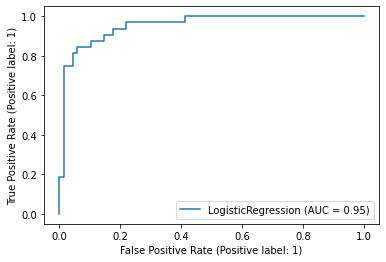

In [19]:

from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test);

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89

here the accuracy of my model is 89% which ic a good fit